In [41]:
from GAN_model import gan_model
from utils import dataset
import glob, os
import numpy as np
from osgeo import gdal 
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

sentinel_1_path= "./extracted_images/Sentinel1/Sentinel1_crop_"
sentinel_2_path= "./extracted_images/Sentinel2/Sentinel2_crop_"

sentinel_1_path = "/Users/alperbalmumcu/Github/sen1-sen2-soil-moisture/extracted_images/Sentinel1/Sentinel1_crop_"
sentinel_2_path = "/Users/alperbalmumcu/Github/sen1-sen2-soil-moisture/extracted_images/Sentinel2/Sentinel2_crop_"

In [20]:
def normalization(data):
    scaler = MinMaxScaler() 
    data_scaled = scaler.fit_transform(data)
    return data_scaled

def image_load(img_path,sentinel_type=1):
    try:
        images = [f for f in glob.glob(img_path+'/*.tif')] 
    except:
        print("[ERROR_PATH] Path is wrong!")
    image_list = []
    feature_list = []
    for img in images:
        image_list = []
        data = gdal.Open(img, gdal.GA_ReadOnly) 
        rgb = np.stack([normalization(data.GetRasterBand(b).ReadAsArray()) for b in range(1,4)] ,axis=2)
        if sentinel_type == 2:
            features = np.stack([normalization(data.GetRasterBand(b).ReadAsArray()) for b in range(10,13)] ,axis=2)
            feature_list.append(features)
        image_list.append(rgb)
    dataset = np.array(image_list, dtype="float")
    if sentinel_type == 2: 
        feature_dataset = np.array(feature_list, dtype="float")
        return image_list,feature_list
    return image_list  



def dataset(dataset_path,sentinel_type=1):
    if sentinel_type == 2:
        bands_dataset = []
        feature_dataset = []
        for station in range(1,14):
            tmp_dataset,tmp_feature_dataset = image_load(f'{dataset_path}{str(station)}',sentinel_type=2)
            bands_dataset.append(tmp_dataset)
            feature_dataset.append(tmp_feature_dataset)
        return bands_dataset,feature_dataset
    elif sentinel_type ==1:
        bands_dataset = []
        for station in range(1,14):
            tmp_dataset = image_load(f'{dataset_path}{str(station)}',sentinel_type=1)
            bands_dataset.append(tmp_dataset)
        return bands_dataset
    else:
        print("[TYPE_ERROR] Given wrong sentinel type number! Please give '1' or '2' for progress.")
    


In [21]:
Sen1 = dataset(sentinel_1_path,sentinel_type= 1)




In [77]:
def make_dataset_s2(img_list,path):
  dataset_rgb = []
  dataset_indices = []

  for i in img_list:
    data = gdal.Open(path+'/'+ i, gdal.GA_ReadOnly) 
    # Note GetRasterBand() takes band no. starting from 1 not 0
    rgb = np.stack([normalize(data.GetRasterBand(b).ReadAsArray()) for b in (3,2,1)] ,axis=2)
    indices = np.stack([normalize(data.GetRasterBand(b).ReadAsArray()) for b in (13,12,11)] ,axis=2) #SRWI,NMDI,NDVI

    dataset_rgb.append(rgb)
    dataset_indices.append(indices)

  dataset_rgb = np.array(dataset_rgb, dtype="float")
  dataset_indices = np.array(dataset_indices, dtype="float")
  return dataset_rgb,dataset_indices

# def normalize(data):
#     scaler = MinMaxScaler() 
#     data_scaled = scaler.fit_transform(data)
#     if np.max(data_scaled) > 1:
#       data
#     return data_scaled

def normalize(image):
  norm = (image - np.min(image)) / (np.max(image) - np.min(image))
  return norm
  # return (norm - 0.5)*2

def make_dataset_s1(img_list,path):
  dataset = []
  for i in img_list:
    data = gdal.Open(path+'/'+ i, gdal.GA_ReadOnly) 
    # Note GetRasterBand() takes band no. starting from 1 not 0
    rgb = np.stack([normalize(data.GetRasterBand(b).ReadAsArray()) for b in (1,2,3)] ,axis=2)


    dataset.append(rgb)

  dataset = np.array(dataset, dtype="float")
  return dataset 


In [78]:
for f in glob.glob(f'{sentinel_2_path}{str(1)}'+'/*.xml'):
    os.remove(f)
for f in glob.glob(f'{sentinel_2_path}{str(1)}'+'/*.DS_Store'):
    os.remove(f)

In [79]:
Sta1_S1_dataset = [f for f in os.listdir(f'{sentinel_2_path}{str(1)}') if os.path.isfile(os.path.join(f'{sentinel_2_path}{str(1)}', f))]
S1_Station1= make_dataset_s1(Sta1_S1_dataset,f'{sentinel_2_path}{str(1)}')


In [89]:
print(Sta1_S1_dataset)

['2020-03-29.tif', '2019-05-29.tif', '2021-09-17.tif', '2020-06-24.tif', '2021-06-12(1).tif', '2019-05-14.tif', '2019-02-28(1).tif', '2021-05-28.tif', '2019-07-13.tif', '2019-02-23.tif', '2020-01-14(1).tif', '2019-05-16.tif', '2019-03-22(1).tif', '2020-01-06.tif', '2019-12-27.tif', '2021-08-31(1).tif', '2019-04-24(1).tif', '2020-06-12(1).tif', '2019-07-15(1).tif', '2019-03-20(1).tif', '2021-07-29.tif', '2021-03-19(1).tif', '2019-09-06.tif', '2020-06-24(1).tif', '2020-09-25(1).tif', '2021-02-19.tif', '2019-07-15.tif', '2021-09-27(1).tif', '2020-08-31.tif', '2021-09-12.tif', '2021-07-17.tif', '2021-07-02.tif', '2020-08-18.tif', '2020-01-14.tif', '2019-02-18.tif', '2020-07-14(1).tif', '2019-01-09(1).tif', '2021-10-07(1).tif', '2019-03-12(1).tif', '2021-07-24(1).tif', '2021-08-08.tif', '2020-05-03(1).tif', '2020-05-03.tif', '2019-08-22.tif', '2020-02-23.tif', '2020-07-07.tif', '2021-08-13(1).tif', '2020-02-23(1).tif', '2021-06-14(1).tif', '2019-06-30.tif', '2020-03-29(1).tif', '2020-04-05(

In [80]:
np.shape(S1_Station1)

(145, 256, 256, 3)

In [86]:
np.mean(S1_Station1[0])

0.12001836515285191

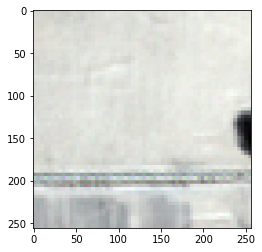

In [92]:
plt.imshow(S1_Station1[10])
plt.show()

In [75]:
S1_Station1

array([[[[-0.8898226 , -0.87885505, -0.84232217],
         [-0.8898226 , -0.87885505, -0.84232217],
         [-0.8898226 , -0.87885505, -0.84232217],
         ...,
         [-0.89019608, -0.85558635, -0.79179358],
         [-0.89019608, -0.85558635, -0.79179358],
         [-0.89019608, -0.85558635, -0.79179358]],

        [[-0.8898226 , -0.87885505, -0.84232217],
         [-0.8898226 , -0.87885505, -0.84232217],
         [-0.8898226 , -0.87885505, -0.84232217],
         ...,
         [-0.89019608, -0.85558635, -0.79179358],
         [-0.89019608, -0.85558635, -0.79179358],
         [-0.89019608, -0.85558635, -0.79179358]],

        [[-0.8898226 , -0.87885505, -0.84232217],
         [-0.8898226 , -0.87885505, -0.84232217],
         [-0.8898226 , -0.87885505, -0.84232217],
         ...,
         [-0.89019608, -0.85558635, -0.79179358],
         [-0.89019608, -0.85558635, -0.79179358],
         [-0.89019608, -0.85558635, -0.79179358]],

        ...,

        [[-0.86293185, -0.77580798, -0

In [25]:
len(Sen1[0][0])

256

In [3]:
Sen1 = dataset(sentinel_1_path,sentinel_type= 1)
print("[SENTINEL 1] dataset created")
Sen2,S2_Features = dataset(sentinel_2_path,sentinel_type= 2)
print("[SENTINEL 2] dataset created")

(0,)
(13,)
(0,)
(13,)
(0,)
(13,)
(0,)
(13,)
(0,)
(13,)
(0,)
(13,)
(0,)
(13,)
(0,)
(13,)
(0,)
(13,)
(0,)
(13,)
(0,)
(13,)
(0,)
(13,)
(0,)
(13,)
[SENTINEL 1] dataset created
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
[SENTINEL 2] dataset created


In [ ]:

image_shape = (256,256,3)

g_model_AtoB = gan_model.define_generator(image_shape)
g_model_BtoA = gan_model.define_generator(image_shape)
d_model_A = gan_model.define_discriminator(image_shape)
d_model_B = gan_model.define_discriminator(image_shape)
c_model_AtoB = gan_model.define_composite_model(g_model_AtoB, d_model_B, g_model_BtoA, image_shape)
c_model_BtoA = gan_model.define_composite_model(g_model_BtoA, d_model_A, g_model_AtoB, image_shape)


In [ ]:
gan_model.train(d_model_A, d_model_B, g_model_AtoB, g_model_BtoA, c_model_AtoB, c_model_BtoA,Sen2,Sen1)
